<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

Uber is an app-based transportation network and taxi company. In its Airport rides in a particular city, many of its users face the problem of cancellation by the driver or non-availability of cars.
These very issues impact the business of Uber and it loses out on its revenue.
The objective is to identify and analyze the problems in Supply-Demand of Uber trips from City to Airport and vice-versa across various hours of the day and find out possible solutions to address the problem

<h2> 1.2 Problem Statement </h2>

1.	Do the analysis on Uber Supply-Demand Gap. Through EDA describe the major issues faced by Uber.
2.	Suggest solutions for high demand supply gap.
3.	What are the issues related to cab drivers?
4.	Suggest solutions for issues related to  ‘No car availability’ and ‘Cancelled rides’.


In [794]:
#importing import libraries
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import datetime as dt

<h3> 2.1  Data </h3>

In [795]:
#importing the data
uber_dataset=pd.read_csv("Uber Request Data.csv")

<h3> 2.1.1 Data overview </h3>

In [796]:
#first five values
uber_dataset.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [797]:
#last five values
uber_dataset.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [798]:
#data type
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [799]:
#printing no. of rows and columns
uber_dataset.shape

(6745, 6)

In [800]:
#printing all columns
print(uber_dataset.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [801]:
#printing unique pickup point
print(uber_dataset['Pickup point'].unique())

['Airport' 'City']


In [802]:
#printing unique status
print(uber_dataset['Status'].unique())

['Trip Completed' 'Cancelled' 'No Cars Available']


In [803]:
#print the counts of unique pickup points
uber_dataset["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [804]:
#print the counts of unique status
uber_dataset["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

<h2> 3.1Data Preprocessing</h2> 

<h3>3.1.1 Converting data to required format</h3>

In [805]:
#converting Request timestamp to datetime
uber_dataset['Request timestamp'] = pd.to_datetime(uber_dataset['Request timestamp'])
uber_dataset['Drop timestamp'] = pd.to_datetime(uber_dataset['Drop timestamp'])
uber_dataset.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [806]:
#printing updated data type
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


<h3>3.1.2 Checking for NaN values </h3>

In [807]:
print("No of Nan values in our dataframe : ", uber_dataset.isnull().any())

No of Nan values in our dataframe :  Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool


------Drop timestamp and driver id has null values because of cancellation or Unavailablity of car.<br>
------Rest of the important data doesn't contain any Null values

<h3>3.1.3 Checking for Duplicates </h3>

In [808]:
dup_bool = uber_dataset.duplicated()
dups = sum(dup_bool) 
print("There are {} duplicate entries in the data..".format(dups))

There are 0 duplicate entries in the data..


In [810]:
#Computing a new column Trip_time
uber_dataset['Trip time']=(uber_dataset['Drop timestamp']-uber_dataset['Request timestamp']).dt.total_seconds()/60

In [811]:
uber_dataset['Trip time'].head()

0    69.000000
1    50.000000
2    41.000000
3    55.000000
4    52.516667
Name: Trip time, dtype: float64

<h3>3.1.3 Removing outlier </h3>

In [813]:
#calculating Average trip time
Trip_time=uber_dataset['Trip time'].copy()
Trip_time=Trip_time.dropna()
Trip_time.mean()

-645.9684446014365

------This suggest that it has drop timestamp is less than Requested time stamp which is practically impossible

In [814]:
#removing datapoints which contain drop timestamp is less than Requested time stamp
uber_dataset['Trip time']=uber_dataset['Trip time'].fillna(0)
uber_dataset=uber_dataset[uber_dataset['Trip time']>=0 ]

In [815]:
uber_dataset.shape

(6732, 7)

In [816]:
#Recalculating average trip time
Trip_time1=uber_dataset[uber_dataset['Trip time']>0]
Trip_time=Trip_time1['Trip time']
Trip_time.mean()

333.971965933286

------Average trip time is around 5 hrs which is practically impossible

In [817]:
#calculating trip time values at each percntile 0,10,20,30,40,50,60,70,80,90,100
for i in range(0,100,10):
    var =Trip_time.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 20.783333333333335
10 percentile value is 34.00000000000001
20 percentile value is 38.8
30 percentile value is 43.05
40 percentile value is 48.0
50 percentile value is 52.28333333333333
60 percentile value is 57.0
70 percentile value is 61.53333333333334
80 percentile value is 66.50000000000001
90 percentile value is 71.88333333333334
100 percentile value is  41835.0


In [818]:
#calculating trip time values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =Trip_time.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 71.88333333333334
91 percentile value is 72.06666666666666
92 percentile value is 72.56666666666666
93 percentile value is 73.0
94 percentile value is 74.0
95 percentile value is 74.8
96 percentile value is 75.58333333333333
97 percentile value is 76.31666666666666
98 percentile value is 77.73333333333333
99 percentile value is 81.0
100 percentile value is  41835.0


In [819]:
#calculating trip time values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =Trip_time.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 81.0
99.1 percentile value is 81.03333333333333
99.2 percentile value is 81.18333333333334
99.3 percentile value is 83.0
99.4 percentile value is 41801.0
99.5 percentile value is 41804.0
99.6 percentile value is 41818.0
99.7 percentile value is 41823.0
99.8 percentile value is 41825.0
99.9 percentile value is 41827.0
100 percentile value is  41835.0


In [821]:
#removing outlier
uber_dataset=uber_dataset[uber_dataset['Trip time']<100]

In [823]:
#Recalculating average trip time
Trip_time1=uber_dataset[uber_dataset['Trip time']>0]
Trip_time=Trip_time1['Trip time']

In [824]:
#Average trip time
Trip_time.mean()

52.37906395141122

In [825]:
uber_dataset.shape

(6713, 7)

In [828]:
#percentage of data retained after preprocessing
data_retained=6713/6745*100
print(str(data_retained)+'%')

99.52557449962936%


<h1> 4. Exploratory Data Analysis </h1>

<h2> 4.1 Univariate data Analysis </h2>

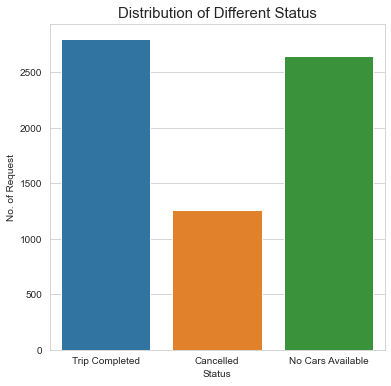

In [829]:
#plotting the histogrqm of status
fig, ax = plt.subplots(figsize=(6,6))
plt.title('Distribution of Different Status', fontsize=15)
sns.countplot(uber_dataset['Status'])
ax.set_xlabel('Status')
ax.set_ylabel('No. of Request')
plt.show()

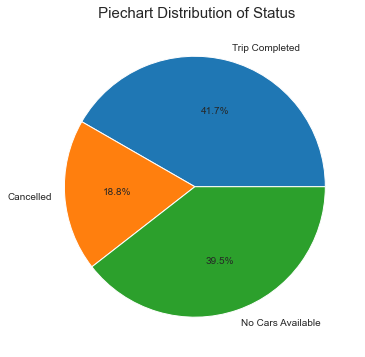

In [830]:
#piechart distribution of status
fig, ax = fig, ax = plt.subplots(figsize=(6,6))
plt.title(' Piechart Distribution of Status', fontsize=15)
x=[len(uber_dataset[uber_dataset['Status']=='Trip Completed']),len(uber_dataset[uber_dataset['Status']=='Cancelled']),len(uber_dataset[uber_dataset['Status']=='No Cars Available'])]
y=['Trip Completed','Cancelled','No Cars Available ']
plt.pie(x,labels=y,autopct='%1.1f%%')
plt.show()

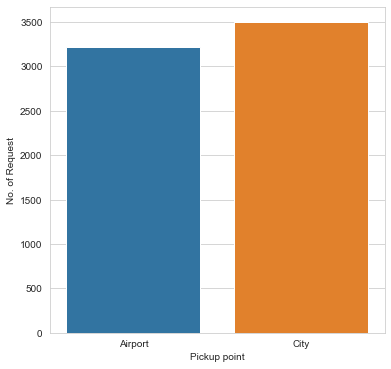

In [831]:
#plotting histogram of pickup points
fig, ax = plt.subplots(figsize=(6,6))
plt.title('', fontsize=15)
sns.countplot(uber_dataset['Pickup point'])
ax.set_xlabel('Pickup point')
ax.set_ylabel('No. of Request')
plt.show()

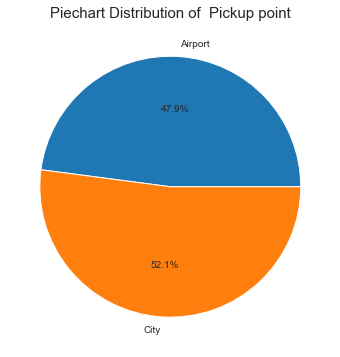

In [832]:
#piechart distribution of pickup points
fig, ax = fig, ax = plt.subplots(figsize=(6,6))
plt.title('Piechart Distribution of  Pickup point', fontsize=15)
x=[len(uber_dataset[uber_dataset['Pickup point']=='Airport']),len(uber_dataset[uber_dataset['Pickup point']=='City'])]
y=['Airport','City']
plt.pie(x,labels=y,autopct='%1.1f%%')
plt.show()

<h3> 4.1.2 Conclusion for univariate data </h3>

-----Pickups from Airport and City is almost equal.<br>
-----The problem of Unavailability of Car is more than Trip cancellation.<br>
-----Unavailability of car and Trip Completed is almost equal.

<h2> 4.2 Bivariate Analysis </h2>

In [833]:
#grouping by Status and Pickup point
uber_dataset.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1306
                   City            1493
dtype: int64

In [860]:
#calculating average trip time from airport to city
Trip_pickup=uber_dataset[uber_dataset['Trip time']>0]
Trip_pickup_air=Trip_pickup[Trip_pickup['Pickup point']=='Airport']
Trip_pickup_air_avg=Trip_pickup_air['Trip time'].mean()
print('The average trip time from airport to city is '+ str(Trip_pickup_air_avg))

The average trip time from airport to city is 52.21276161306789


In [861]:
#calculating average trip time from city to airport
Trip_pickup_city=Trip_pickup[Trip_pickup['Pickup point']=='City']
Trip_pickup_city_avg=Trip_pickup_city['Trip time'].mean()
print('The average trip time from city to airport is '+ str(Trip_pickup_city_avg))

The average trip time from city to airport is 52.52453672694798


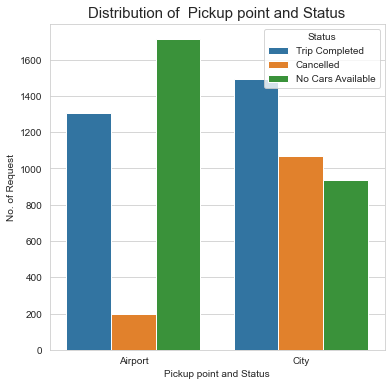

In [834]:
# Visualizing the count of Status and Pickup point bivariate analysis
fig, ax = fig, ax = plt.subplots(figsize=(6,6))
plt.title('Distribution of  Pickup point and Status', fontsize=15)
sns.countplot(x=uber_dataset['Pickup point'],hue =uber_dataset['Status'] ,data = uber_dataset)
ax.set_xlabel('Pickup point and Status')
ax.set_ylabel('No. of Request')
plt.show()

-----Cancellation occur mostly  at city.<br>
-----The problem of unavailability of car is almost double at Airport.

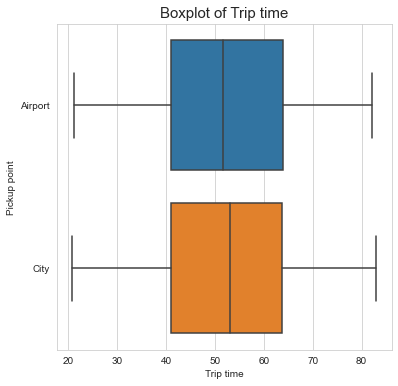

In [872]:
#boxplot for trip time from airport to city and vice-versa
fig, ax = plt.subplots(figsize=(6,6))
plt.title('Boxplot of Trip time', fontsize=15)
sns.boxplot(x=Trip_pickup['Trip time'],y=Trip_pickup['Pickup point'] )
ax.set_xlabel('Trip time')
ax.set_ylabel('Pickup point')
plt.show()

------There is no significant difference between trip time from both pickup points.

<h2> 4.2.1 Calculating new metrics </h2>

In [835]:
#calculating new column day of the week
uber_dataset['day of the week'] = uber_dataset['Request timestamp'].dt.day_name()

In [836]:
#calculating new column Request of the hour
uber_dataset['day of the week'] = uber_dataset['Request timestamp'].dt.day_name()
uber_dataset['Request Hour'] = uber_dataset['Request timestamp'].dt.hour

In [837]:
#Dividing 24-hr period in 6 time slots
uber_dataset['Request Time Slot'] = 'Late night'
uber_dataset.loc[uber_dataset['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
uber_dataset.loc[uber_dataset['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
uber_dataset.loc[uber_dataset['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
uber_dataset.loc[uber_dataset['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uber_dataset.loc[uber_dataset['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [838]:
#Calculating new column Gap by coverting cancellation and unavailability into trip not completed
uber_dataset.loc[uber_dataset['Status']=="Trip Completed","Gap"] = 'Trip Completed'
uber_dataset.loc[uber_dataset['Status']!='Trip Completed','Gap'] = 'Trip Not Completed'

In [839]:
#Removing unnecessary columns
uber_dataset= uber_dataset.drop(['Request Hour'], axis=1)

In [840]:
uber_dataset.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip time,day of the week,Request Time Slot,Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.000000,Monday,Late Morning,Trip Completed
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.000000,Monday,Evening,Trip Completed
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.000000,Wednesday,Late Morning,Trip Completed
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.000000,Wednesday,Night,Trip Completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.516667,Wednesday,Morning,Trip Completed
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.516667,Wednesday,Night,Trip Completed
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.716667,Thursday,Morning,Trip Completed
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.000000,Friday,Morning,Trip Completed
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.400000,Friday,Evening,Trip Completed
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,39.000000,Monday,Morning,Trip Completed


<h2> 4.2.2 Visualisation with respect to new metrics </h2>

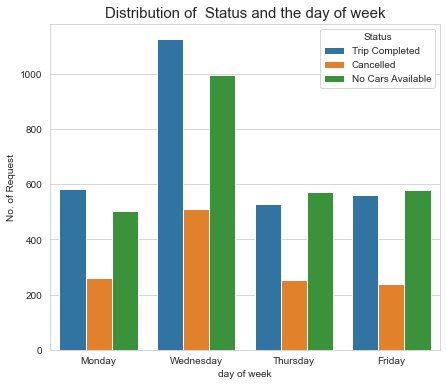

In [841]:
#Bivariate histogram of Status and the day of week
fig, ax = fig, ax = plt.subplots(figsize=(7,6))
plt.title('Distribution of  Status and the day of week', fontsize=15)
sns.countplot(x=uber_dataset['day of the week'],hue =uber_dataset['Status'] ,data = uber_dataset)
ax.set_xlabel('day of week')
ax.set_ylabel('No. of Request')
plt.show()

**Wednesday has more surge in traffic**

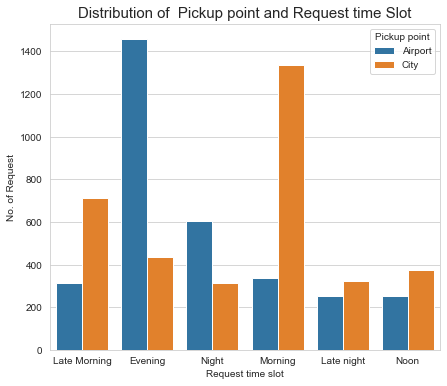

In [842]:
#Bivariate histogram of Status and Request time slot
fig, ax = fig, ax = plt.subplots(figsize=(7,6))
plt.title('Distribution of  Pickup point and Request time Slot', fontsize=15)
sns.countplot(x=uber_dataset['Request Time Slot'],hue =uber_dataset['Pickup point'] ,data = uber_dataset)
ax.set_xlabel('Request time slot')
ax.set_ylabel('No. of Request')
plt.show()

-----There is more request at city in morning.<br>
-----There is more request at Airport evening

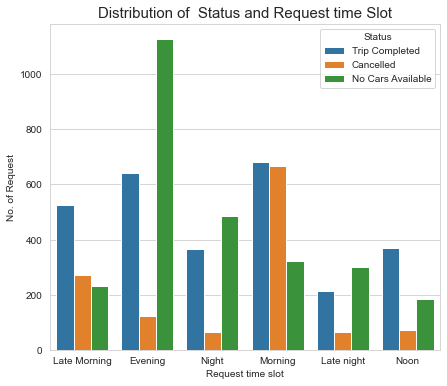

In [843]:
#Bivariate histogram of Status and Request time slot
fig, ax = fig, ax = plt.subplots(figsize=(7,6))
plt.title('Distribution of  Status and Request time Slot', fontsize=15)
sns.countplot(x=uber_dataset['Request Time Slot'],hue =uber_dataset['Status'] ,data = uber_dataset)
ax.set_xlabel('Request time slot')
ax.set_ylabel('No. of Request')
plt.show()

----There is high unavailability of car in evening.<br>
----There is surge in cancellation at morning.

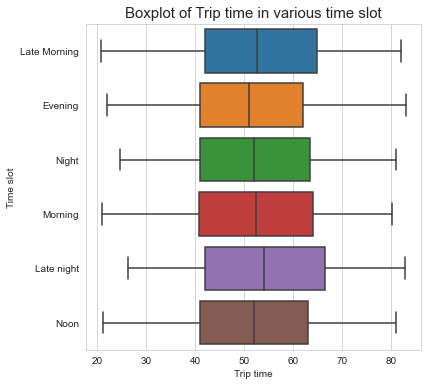

In [874]:
#boxplot for trip time in various time slot
Trip_pickup_time=uber_dataset[uber_dataset['Trip time']>0]
fig, ax = plt.subplots(figsize=(6,6))
plt.title('Boxplot of Trip time in various time slot', fontsize=15)
sns.boxplot(x=Trip_pickup_time['Trip time'],y=Trip_pickup_time['Request Time Slot'] )
ax.set_xlabel('Trip time')
ax.set_ylabel('Time slot')
plt.show()

-----Trip time doesn't change very much in different time slots ,so it means there is regular traffic throught the day.

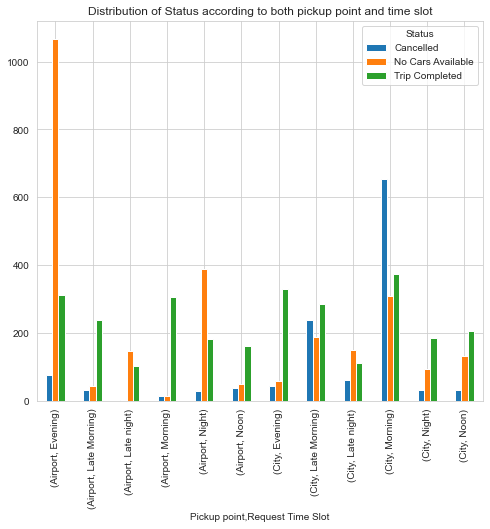

In [844]:
#Distribution of Status according to both pickup point and time slot
Stat_pickup = pd.DataFrame(uber_dataset.groupby(['Pickup point','Request Time Slot', 'Status'])['Pickup point'].count().unstack(fill_value=0))
Stat_pickup.plot.bar(figsize=(8,7))
plt.title("Distribution of Status according to both pickup point and time slot")
plt.show()

----Large no. of cancellation occur in city are mostly in morning and late morning.<br>
----There is huge surge in unavailability of car at Airport evening and at night.<br>
----At late night there is significant unavailability of car in city and Airport.

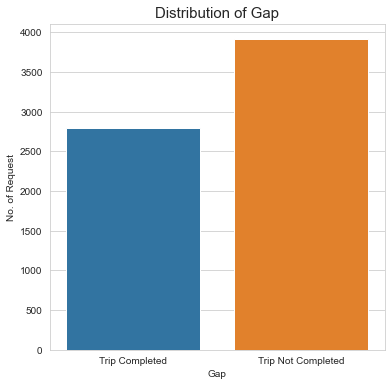

In [845]:
#histogram of Gap
fig, ax = plt.subplots(figsize=(6,6))
plt.title('Distribution of Gap', fontsize=15)
sns.countplot(uber_dataset['Gap'])
ax.set_xlabel('Gap')
ax.set_ylabel('No. of Request')
plt.show()

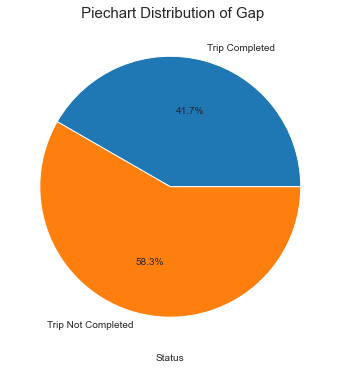

In [846]:
#piechart didtribution  of Gap
fig, ax = fig, ax = plt.subplots(figsize=(6,6))
plt.title(' Piechart Distribution of Gap', fontsize=15)
x=[len(uber_dataset[uber_dataset['Gap']=='Trip Completed']),len(uber_dataset[uber_dataset['Gap']=='Trip Not Completed'])]
y=['Trip Completed','Trip Not Completed']
plt.pie(x,labels=y,autopct='%1.1f%%')
ax.set_xlabel('Status')
plt.show()

**Unsuccesful trip is more than the succesful trip**.

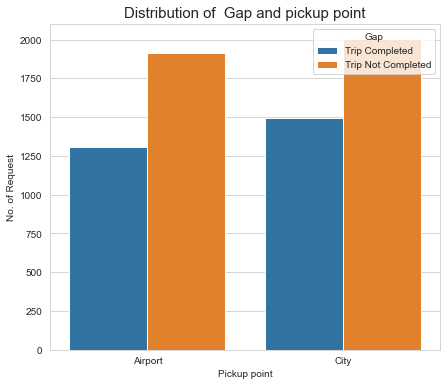

In [847]:
#Bivariate histogram of Gap and pickup point
fig, ax = fig, ax = plt.subplots(figsize=(7,6))
plt.title('Distribution of  Gap and pickup point', fontsize=15)
sns.countplot(x=uber_dataset['Pickup point'],hue =uber_dataset['Gap'] ,data = uber_dataset)
ax.set_xlabel('Pickup point')
ax.set_ylabel('No. of Request')
plt.show()

**The ratio of succesful trip vs unsuccesful trip is almost at airport and city equal**

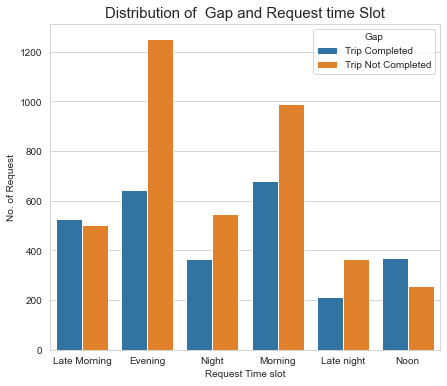

In [848]:
#Bivariate histogram of Gap and timesslot
fig, ax = fig, ax = plt.subplots(figsize=(7,6))
plt.title('Distribution of  Gap and Request time Slot', fontsize=15)
sns.countplot(x=uber_dataset['Request Time Slot'],hue =uber_dataset['Gap'] ,data = uber_dataset)
ax.set_xlabel('Request Time slot')
ax.set_ylabel('No. of Request')
plt.show()

-----The gap between succesful trip vs unsuccesful trip occur mostly at morning and evening.<br>
-----The gap is its peak at evening.

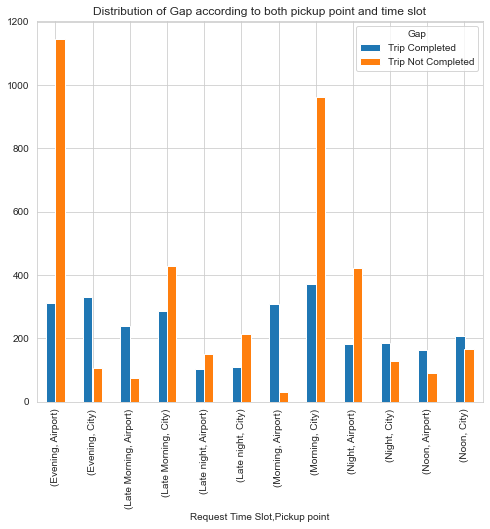

In [849]:
#Distribution of Gap according to both pickup point and time slot
Gap_pickup = pd.DataFrame(uber_dataset.groupby(['Request Time Slot','Pickup point','Gap'])['Pickup point'].count().unstack(fill_value=0))
Gap_pickup.plot.bar(figsize=(8,7))
plt.title("Distribution of Gap according to both pickup point and time slot")
plt.show()

-----There is high gap between in succesful trip vs unsuccesful trip at Airport in evenining and a significant gap at night.<br>
-----There is high gap between in succesful trip vs unsuccesful trip at city in morning.

<h1> 5. Final conclusion </h1>

-----In the  Morning and late morning time slot where the demand for City to Airport trips are high, there are maximum number of trip cancellations leading to great Gap in the Demand and Supply.<br>
-----In the Evening and night time slot  where the demand for Airport to City trips are high, there are maximum number of “No -------Cars Available” leading to great Gap in the Demand & Supply.<br>
-----In the late night for both Airport to City and City to Airport trip ,there is significant number of “No Cars Available” leading to Gap in the Demand and Supply.

<h2> A.2- Solution for high demand supply Gap</h2>

Most of the supply-demand gap occurring in city due to cancellation of ride in morning and late morning .<br>
1. one possible reason for the cancellation could be more no. of flights taking off in morning as compared to the arrival of  flights.So this cause unidirectional trip for cab driver .<br>
2. one of the possible reason could be as the average trip time  for ride is 52 min they might more interested in short trip for quick money.<br>
3. In the morning there is lot of rush in city, school time ,office time so there is lot of possible ride within city for quick money.<br>
<br>-------**This can be reduced by increasing incentive at morning from city to airport**.

Most of the supply-demand gap occurring at airport in evening  is due to unavailability of car.<br>
1. one of the possible reason could be less no. of people travelling from city to airport during this period. So this creates shortage of car in general at airport.<br>
2. one of the possible reason could be most of the cab driver end their shift in evening.<br>
3. one of the possible reason could be more flights arrive at airport in evening as compared to taking off.<br>
<br>-------**This can be reduced by deploying more cars at airport in the evening and by increasing incentives in evening at airport to city**.

There is significant no. of supply-demand gap in night due to unavailability of cars at both pickup points
.<br>---------**This can be reduced by encouraging cab drivers for night shift by increasing incentive and perks for night shift**.

--------There is also shortage of cars in general ,so increase in no of cars also help in curbing supply-demand gap

---------Educating cab driver about supply-demand gap

----------Encouraging cab driver to take request from Airport to city as there is lower cancellation rate and the travelling time will be potentially higher,it will be financially beneficial both uber and cab driver.

<h2> A.3- Issues related to cab drivers</h2>

---Unidirectional trips<br>
---Less no. of request during night and late night time slot<br>

<h2> A.4 - Solutions for issues related to  ‘No car availability’ and ‘Cancelled rides’</h2>

--------Issue of cancellation could be decreased by increasing incentives during morning and latemorning hours from city to airport trip.

--------Issue of No car availability can be curb by Deploying more cars at airport in evening <br>
---*by encouraging cab drivers for night shift by means of incentive and perks*<br>
---*Increase the no. of cabs in general*
